# 1조 주제: 국내 장애인의 현황과 복지 현황

## 개인 주제 : 국내 장애인 ‘교육’의 현황과 관련 복지 현황

### 자료출처 

- 국내통계포털 KOSIS
    
    - 가장 많이 사용하는 교수 학습 자료
    - 특수학교 중학교 및 고등학교의 교과수업 형태
    - 교육과정 운영을 어렵게 하는 사항
    - 보호자의 특수교육 관련서비스 지원에 대한 만족도
    - 현재 지원 받고 있는 특수교육 관련서비스 중복응답
    - 향후 지원이 필요한 특수교육 관련서비스
    
- sideview 인터넷신문
- 노컷뉴스

In [287]:
# 모듈 로딩
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import platform

if platform.system()=='Windows':
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')

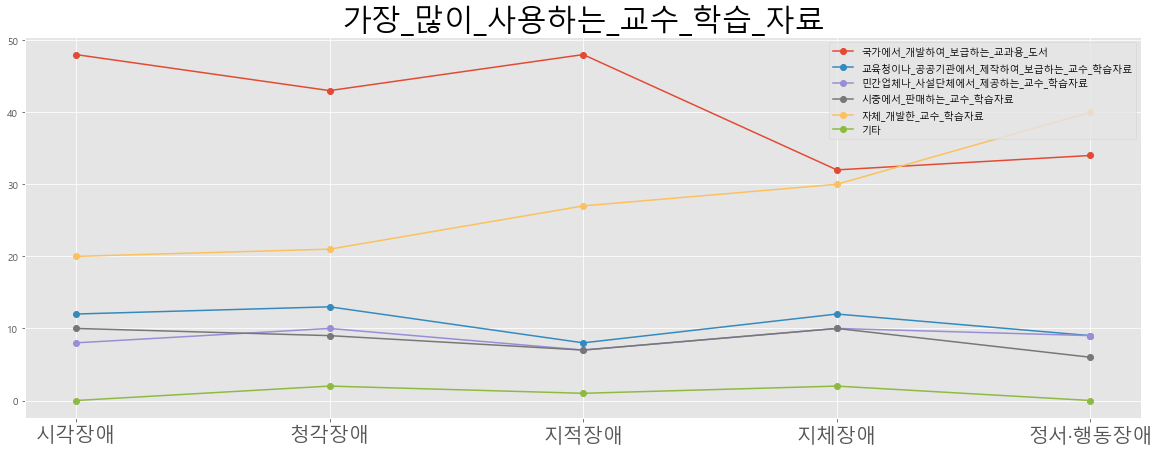

,장애영역별,국가에서_개발하여_보급하는_교과용_도서,교육청이나_공공기관에서_제작하여_보급하는_교수_학습자료,민간업체나_사설단체에서_제공하는_교수_학습자료,시중에서_판매하는_교수_학습자료,자체_개발한_교수_학습자료,기타
0,시각장애,48,12,8,10,20,0
1,청각장애,43,13,10,9,21,2
2,지적장애,48,8,7,7,27,1
3,지체장애,32,12,10,10,30,2
4,정서·행동장애,34,9,9,6,40,0


In [288]:
# 1) 가장_많이_사용하는_교수_학습_자료
conn = pymysql.connect(host='localhost', user='root', password='0926', db='project6', charset='utf8')

cur = conn.cursor()
query='''
select `특성별(3)` as 장애영역별,국가에서_개발하여_보급하는_교과용_도서,교육청이나_공공기관에서_제작하여_보급하는_교수_학습자료,민간업체나_사설단체에서_제공하는_교수_학습자료,시중에서_판매하는_교수_학습자료,자체_개발한_교수_학습자료,기타
from 가장_많이_사용하는_교수_학습_자료
where `특성별(3)` in ('시각장애','청각장애','지적장애','지체장애','정서·행동장애')
and 항목='비율 (%)';
'''  # 실제 쿼리와 동일한 문자열 전달 (따옴표 주의)
cur.execute(query)
rows=cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

problem1_df=pd.DataFrame(rows)
problem1_df.columns=[desc[0][0],desc[1][0],desc[2][0],desc[3][0],desc[4][0],desc[5][0],desc[6][0]]


plt.figure(figsize=(20,7))
for i in problem1_df.columns[1:]:
    plt.plot(problem1_df['장애영역별'],problem1_df[i], label=i, marker='o')
plt.title('가장_많이_사용하는_교수_학습_자료',fontsize=30)
plt.xticks(fontsize=20)
plt.legend()
plt.show()

problem1_df

##### 장애영역을 통틀어 국가에서 개발하여 보급하는 교과용 도서와 자체 개발한 교수 학습자료를 많이 사용하는 것을 알 수 있다.

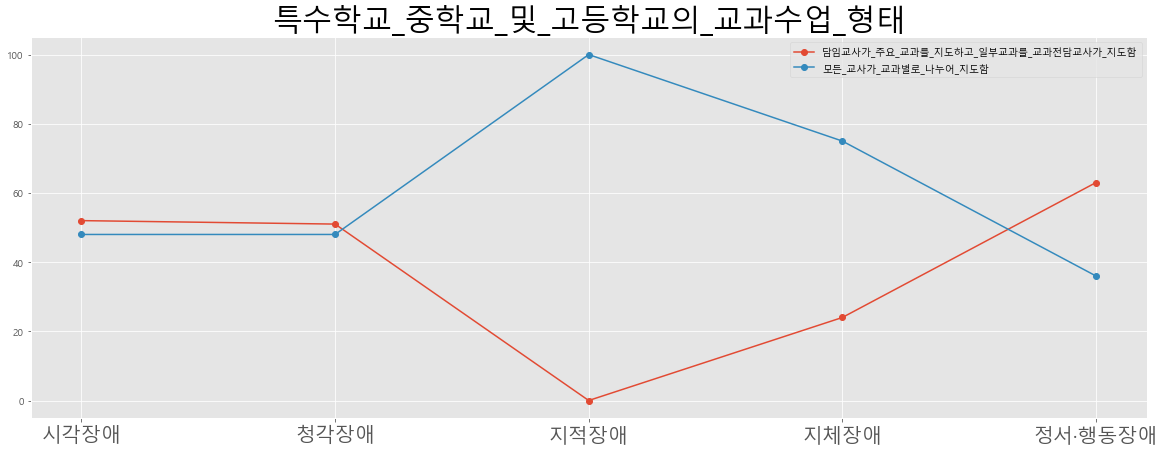

,장애영역별,담임교사가_주요_교과를_지도하고_일부교과를_교과전담교사가_지도함,모든_교사가_교과별로_나누어_지도함
0,시각장애,52,48
1,청각장애,51,48
2,지적장애,0,100
3,지체장애,24,75
4,정서·행동장애,63,36


In [289]:
# 4) 특수학교_중학교_및_고등학교의_교과수업_형태
conn = pymysql.connect(host='localhost', user='root', password='0926', db='project6', charset='utf8')

cur = conn.cursor()
query='''
select `특성별(2)`as 장애영역별,담임교사가_주요_교과를_지도하고_일부교과를_교과전담교사가_지도함,모든_교사가_교과별로_나누어_지도함
from 특수학교_중학교_및_고등학교의_교과수업_형태 
where `특성별(2)` in ('시각장애','청각장애','지적장애','지체장애','정서·행동장애')
and 항목='비율 (%)';
'''  # 실제 쿼리와 동일한 문자열 전달 (따옴표 주의)
cur.execute(query)
rows=cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

problem4_df=pd.DataFrame(rows)
problem4_df.columns=[desc[0][0],desc[1][0],desc[2][0]]


plt.figure(figsize=(20,7))
for i in problem4_df.columns[1:]:
    plt.plot(problem4_df['장애영역별'],problem4_df[i], label=i, marker='o')
plt.title('특수학교_중학교_및_고등학교의_교과수업_형태',fontsize=30)
plt.xticks(fontsize=20)
plt.legend()
plt.show()

problem4_df


##### 지적 장애를 가진 경우 언어 지연, 인지, 학습기능의 발달 문제를 보이고, 지체 장애를 가진 경우 골격,근육,신경 계통의 질환, 손상, 기능 및 발달 이상으로 신체의 이동과 움직임 등에 어려움이 있다.

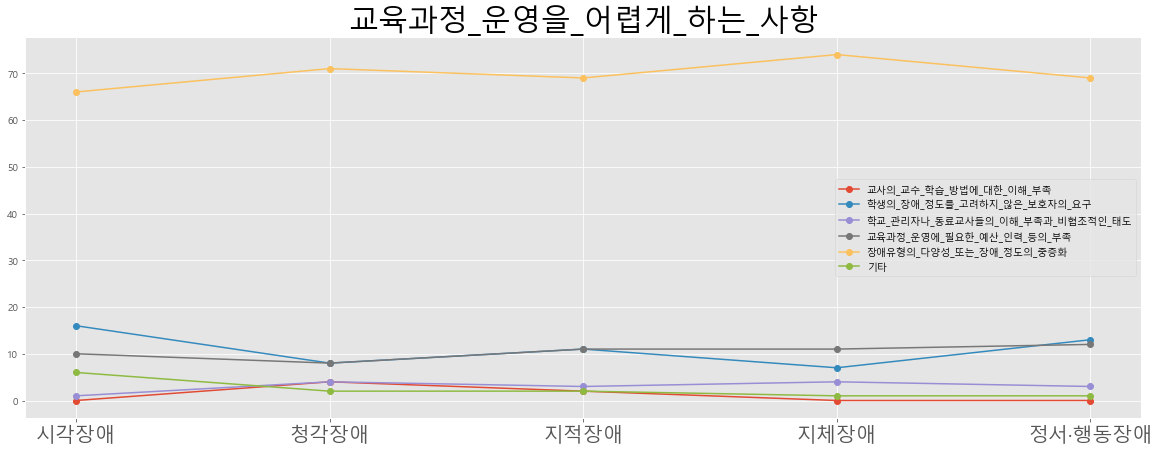

,장애영역별,교사의_교수_학습_방법에_대한_이해_부족,학생의_장애_정도를_고려하지_않은_보호자의_요구,학교_관리자나_동료교사들의_이해_부족과_비협조적인_태도,교육과정_운영에_필요한_예산_인력_등의_부족,장애유형의_다양성_또는_장애_정도의_중증화,기타
0,시각장애,0,16,1,10,66,6
1,청각장애,4,8,4,8,71,2
2,지적장애,2,11,3,11,69,2
3,지체장애,0,7,4,11,74,1
4,정서·행동장애,0,13,3,12,69,1


In [290]:
# 2) 교육과정_운영을_어렵게_하는_사항
conn = pymysql.connect(host='localhost', user='root', password='0926', db='project6', charset='utf8')

cur = conn.cursor()
query='''
select `특성별(3)` as 장애영역별,교사의_교수_학습_방법에_대한_이해_부족,학생의_장애_정도를_고려하지_않은_보호자의_요구,학교_관리자나_동료교사들의_이해_부족과_비협조적인_태도,교육과정_운영에_필요한_예산_인력_등의_부족,장애유형의_다양성_또는_장애_정도의_중증화,기타
from 교육과정_운영을_어렵게_하는_사항
where `특성별(3)` in ('시각장애','청각장애','지적장애','지체장애','정서·행동장애')
and 항목='비율 (%)';
'''  # 실제 쿼리와 동일한 문자열 전달 (따옴표 주의)
cur.execute(query)
rows=cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

problem2_df=pd.DataFrame(rows)
problem2_df.columns=[desc[0][0],desc[1][0],desc[2][0],desc[3][0],desc[4][0],desc[5][0],desc[6][0]]


plt.figure(figsize=(20,7))
for i in problem2_df.columns[1:]:
    plt.plot(problem2_df['장애영역별'],problem2_df[i], label=i, marker='o')
plt.title('교육과정_운영을_어렵게_하는_사항',fontsize=30)
plt.xticks(fontsize=20)
plt.legend()
plt.show()

problem2_df

##### 모든 장애영역을 통틀어 장애유형의 다양성 또는 장애 정도의 중증화가 교육과정 운영을 어렵게 하는 사항입니다.

### 특수교육 관련서비스

- 특수교육 대상자의 교육을 효율적으로 실시하기 위해 필요한 인적·물적 자원을 제공하는 서비스

- 가족지원
    - 특수교육 대상자와 그 가족이 제공 받을 수 있다.
        - 가족상담
        - 부모교육
        - 양육상담
        - 보호자 교육
        - 가족지원프로그램 운영

- 치료지원
    - 특수교육자대상자에게 물리치료 및 작업치료 등의 치료지원을 제공 받을 수 있다.
    
- 보조인력지원
    - 특수교육대상자는 교육 및 학교 활동을 위해 보조 역할등을 담당하는 보조인력을 제공 받을 수 있다.
        - 교수학습 활동
        - 신변처리
        - 급식
        - 교내외 활동
        - 등·하교 등
- 각종 교구 및 학습보조기
    - 특수교육대상자는 교육을 위해 필요한 장애인용 각종 교구, 각종 학습 보조기 및 보조 공학기 등을 제공 받을 수 있다.
    
- 통학지원 서비스
    - 특수교육대상자는 취학 편의를 위해 통학차량 지원, 통학비 지원 및 통학 보조인력의 지원등을 제공 받을 수 있다.

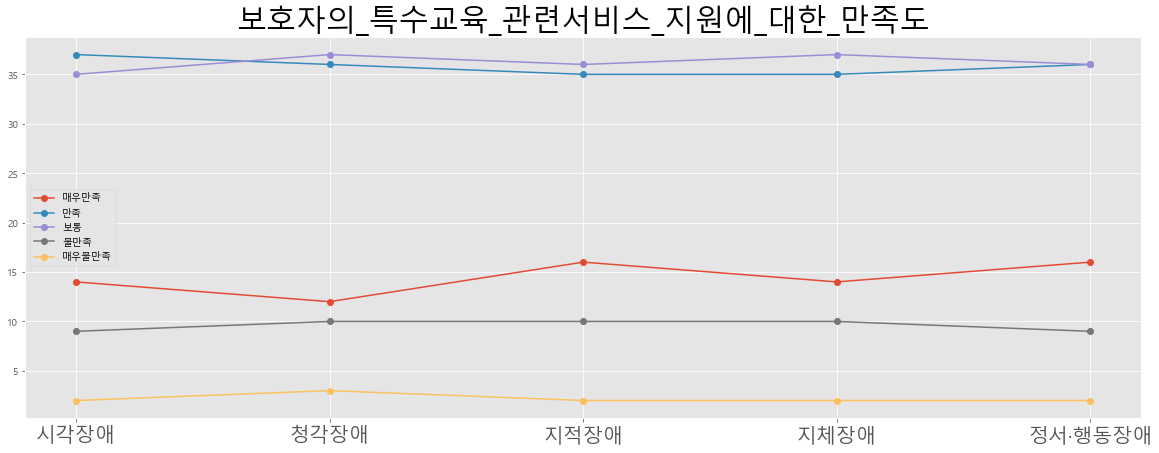

,장애영역별,매우만족,만족,보통,불만족,매우불만족
0,시각장애,14,37,35,9,2
1,청각장애,12,36,37,10,3
2,지적장애,16,35,36,10,2
3,지체장애,14,35,37,10,2
4,정서·행동장애,16,36,36,9,2


In [291]:
# 3) 보호자의_특수교육_관련서비스_지원에_대한_만족도
conn = pymysql.connect(host='localhost', user='root', password='0926', db='project6', charset='utf8')

cur = conn.cursor()
query='''
select `특성별(2)` as 장애영역별,매우만족,만족,보통,불만족,매우불만족
from 보호자의_특수교육_관련서비스_지원에_대한_만족도
where `특성별(2)` in ('시각장애','청각장애','지적장애','지체장애','정서·행동장애')
and 항목='비율 (%)';
'''  # 실제 쿼리와 동일한 문자열 전달 (따옴표 주의)
cur.execute(query)
rows=cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

problem3_df=pd.DataFrame(rows)
problem3_df.columns=[desc[0][0],desc[1][0],desc[2][0],desc[3][0],desc[4][0],desc[5][0]]


plt.figure(figsize=(20,7))
for i in problem3_df.columns[1:]:
    plt.plot(problem3_df['장애영역별'],problem3_df[i], label=i, marker='o')
plt.title('보호자의_특수교육_관련서비스_지원에_대한_만족도',fontsize=30)
plt.xticks(fontsize=20)
plt.legend()
plt.show()

problem3_df

#### 만족과 보통

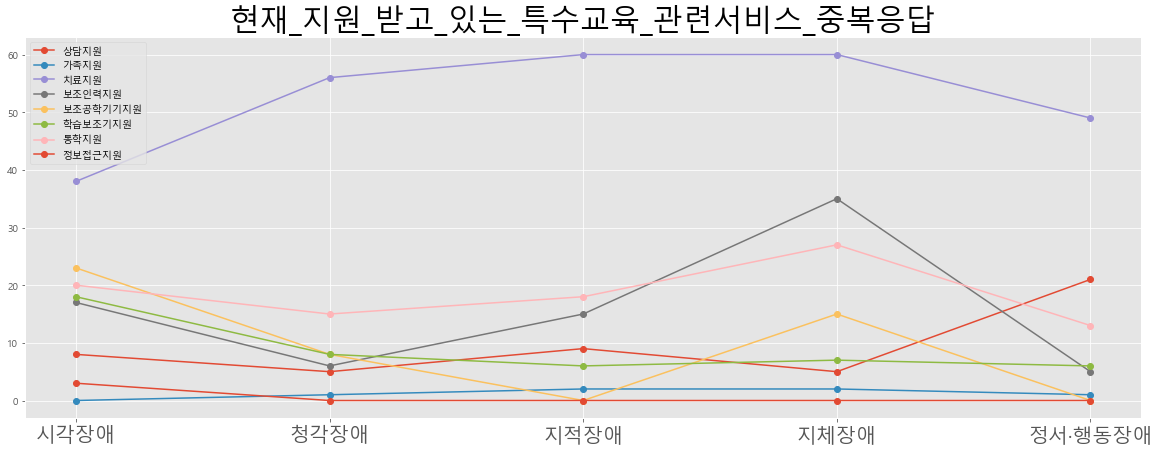

,장애영역별,상담지원,가족지원,치료지원,보조인력지원,보조공학기기지원,학습보조기지원,통학지원,정보접근지원,기타,없음
0,시각장애,8,0,38,17,23,18,20,3,1,23
1,청각장애,5,1,56,6,8,8,15,0,1,26
2,지적장애,9,2,60,15,0,6,18,0,1,20
3,지체장애,5,2,60,35,15,7,27,0,0,15
4,정서·행동장애,21,1,49,5,0,6,13,0,2,24


In [292]:
# 6) 현재_지원_받고_있는_특수교육_관련서비스_중복응답
conn = pymysql.connect(host='localhost', user='root', password='0926', db='project6', charset='utf8')

cur = conn.cursor()
query='''
select `특성별(2)` as 장애영역별,상담지원,가족지원,치료지원,보조인력지원,보조공학기기지원,학습보조기지원,통학지원,정보접근지원,기타,없음
from 현재_지원_받고_있는_특수교육_관련서비스_중복응답
where `특성별(2)` in ('시각장애','청각장애','지적장애','지체장애','정서·행동장애')
and 항목='비율 (%)';
'''  # 실제 쿼리와 동일한 문자열 전달 (따옴표 주의)
cur.execute(query)
rows=cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

problem6_df=pd.DataFrame(rows)
problem6_df.columns=[desc[0][0],desc[1][0],desc[2][0],desc[3][0],desc[4][0],desc[5][0],desc[6][0],desc[7][0],desc[8][0],desc[9][0],desc[10][0]]


plt.figure(figsize=(20,7))
for i in problem6_df.columns[1:-2]:
    plt.plot(problem6_df['장애영역별'],problem6_df[i], label=i, marker='o')
plt.title('현재_지원_받고_있는_특수교육_관련서비스_중복응답',fontsize=30)
plt.xticks(fontsize=20)
plt.legend()
plt.show()

problem6_df

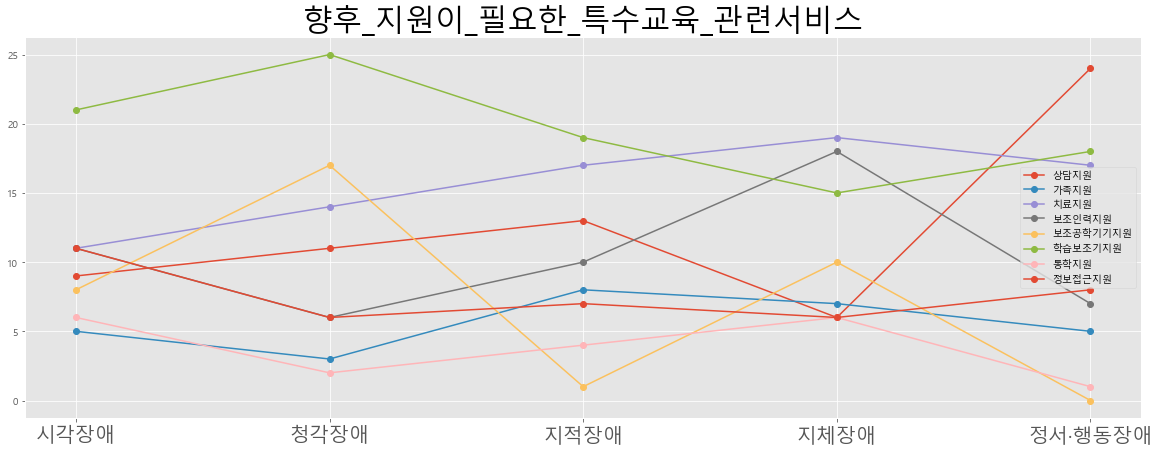

,장애영역별,상담지원,가족지원,치료지원,보조인력지원,보조공학기기지원,학습보조기지원,통학지원,정보접근지원,기타,없음
0,시각장애,9,5,11,11,8,21,6,11,5,8
1,청각장애,11,3,14,6,17,25,2,6,5,6
2,지적장애,13,8,17,10,1,19,4,7,6,10
3,지체장애,6,7,19,18,10,15,6,6,4,5
4,정서·행동장애,24,5,17,7,0,18,1,8,6,10


In [293]:
# 5) 향후_지원이_필요한_특수교육_관련서비스
conn = pymysql.connect(host='localhost', user='root', password='0926', db='project6', charset='utf8')

cur = conn.cursor()
query='''
select `특성별(2)` as 장애영역별,상담지원,가족지원,치료지원,보조인력지원,보조공학기기지원,학습보조기지원,통학지원,정보접근지원,기타,없음
from 향후_지원이_필요한_특수교육_관련서비스
where `특성별(2)` in ('시각장애','청각장애','지적장애','지체장애','정서·행동장애')
and 항목='비율 (%)';
'''  # 실제 쿼리와 동일한 문자열 전달 (따옴표 주의)
cur.execute(query)
rows=cur.fetchall() # 모든 데이터를 가져옴
desc = cur.description

problem5_df=pd.DataFrame(rows)
problem5_df.columns=[desc[0][0],desc[1][0],desc[2][0],desc[3][0],desc[4][0],desc[5][0],desc[6][0],desc[7][0],desc[8][0],desc[9][0],desc[10][0]]



plt.figure(figsize=(20,7))
for i in problem5_df.columns[1:-2]:
    plt.plot(problem5_df['장애영역별'],problem5_df[i], label=i, marker='o')
plt.title('향후_지원이_필요한_특수교육_관련서비스',fontsize=30)
plt.xticks(fontsize=20)
plt.legend()
plt.show()

problem5_df

- 대부분 정서행동장애의 경우 단순한 면담과 약물치료만을 시행한다.
- 하지만 치료비가 매우 비싸 정해진 교육청 예산으로 부족하여 제대로 된 치료를 지원하기는 어려운 실정이다.
- 따라서 전문적인 상담 역량을 확보하고 지속적 관리로 긍정적인 인식으로 전환될 수 있도록 근본적인 방법이 좋다.

- 보조공학기기: https://blog.naver.com/lifeplanhd/222391410191

# ------------------------------------------

In [294]:
# 웹크롤링1 - sideview 인터넷신문
from urllib.request import urlopen
from bs4 import BeautifulSoup

html=urlopen('http://www.sideview.co.kr/news/articleView.html?idxno=9759')
soup=BeautifulSoup(html, "html.parser")

In [295]:
article=soup.find('article',{'class':'article-veiw-body view-page'})

values=[]
for value in article.find_all('p'):
    values.append(value.text)

# print(values[2],values[6],values[7], sep='\n')
values

['강원도 특수학교가 지역내 특수교육대상자의 27.4%만 수용하고 있는 것으로 나타나 장애인 교육 복지 확충의 필요성이 제기되고 있다.',
 '교육부의 “2021 특수교육통계” 자료에 따르면 도내 특수교육대상 학생은 2,955명인데 반해, 특수학교는 8곳만 존재, 대상 학생의 72.6%가 장애인 특수교육 관련 시설이 전무하거나 부족한 일반학교와 특수교육지원센터에 다니고 있다. 게다가, 이 8곳 중 5곳이나 춘천 원주 지역에 몰려 있어 도내 특수교육 대상자들의 교육복지 현실은 열악한 상황이다.',
 '특수교육 시설의 해당 지역 교육 수요자 수용률은 전국적으로 낮은 편이지만, 27%대에 그친 강원도의 경우, 서울 34.5%, 대구 33.9%, 광주 33.8%에도 못 미치고 있다.',
 '지난달 2일 지역 주민들의 반대로 오랜 진통을 겪던 동해해솔학교가 8년 만에 개교, 현재 강원도 내 특수학교는 9곳이 되었다. 왜 특수교육 시설이 교육 수혜자의 수요에 턱없이 모자라는데도 이처럼 증설이 어려운 것일까. 이와 관련, 강원도민들의 특수학교 인지도와 필요성에 대한 인식을 알아보기 위해 지난달 24일부터 4일간 강원도에 거주 중인 시민 106명을 대상으로 온라인 및 오프라인 설문조사를 진행했다.',
 '설문조사 결과 특수학교에 대해 “알고 있다”고 답한 사람은 전체 응답자의 77.4%를 차지했고, “특수학교가 필요하다”는 응답은 92.5%에 달하는 것으로 나타났다. 그러나, ‘자신이 거주하는 곳 주변에 특수학교가 들어오는 것’에 대해서는 훨씬 적은 67%만 “긍정적”이라고 응답했다.',
 '특수학교 필요성 인식과 거주지 주변 특수학교에 대한 긍정적 응답의 차이를 이 교육 시설에 대한 거부감의 작용으로 해석한다면, 그 거부감의 원인은 무엇일까. 춘천에 있는 한 시각장애 특수학교 교사는 이에 대해, “장애 아동에 대한 막연한 두려움과 오해”나 “집값 하락”에 대한 ‘혹시나’ 하는 걱정을 꼬집었다.',
 '그러나, 장애인들이 특수학교에서 누릴 교육의 혜택은, 일반인의 이런 막연

In [296]:
# 웹크롤링2 - 노컷뉴스
from urllib.request import urlopen
from bs4 import BeautifulSoup

html1=urlopen('https://www.nocutnews.co.kr/news/4849068')
soup1=BeautifulSoup(html1, "html.parser")

In [297]:
div=soup1.find('div',{'id':'pnlContent'})
div.text.strip()

'최근 열린 장애인 특수학교 설립 공청회에서는 장애아동 학부모들이 무릎을 꿇고 특수학교설립을 호소해 보는 이들의 마음을 안타깝게 만들었다. 지역주민들이 기피시설로 인식하고 있는 장애인 특수학교 설립을 둘러싼 갈등을 풀 해법은 없을까.\n\n\n\n서울 강서구에 위치한 옛 공진초등학교. \n\n\n\xa0\n\n\n\n\r\n서울 강서구에 있는 옛 공진초등학교 자리를 놓고 이 지역에 부족한 장애인 특수학교를 설립해야 한다는 학부모들의 주장과 지역발전을 위해 국립한방병원을 세워야 한다는 지역주민들의 주장이 팽팽히 맞서고 있다. 장애인 학부모측은 "장애가 있다는 이유 하나만으로 집에서 두 시간 전부터 학교에 가기 위해 나와야 하는 현실"이라며 공진초 이전 부지에 특수학교가 반드시 설립돼야 한다고 강조했다. 반면 특수학교 설립 반대 비상대책위측은 "허준 선생이 태어나고 동의보감을 집필한 지역적 특성을 감안해서 서울에서 유일한 국립한방병원을 설치해야 한다"고 맞섰다.이처럼 첨예한 대립을 보이고 있는 장애인 특수학교를 둘러싼 해법은 없을까.우선 장애인에 대한 부정적인 인식을 바꿔야 한다. 장애인 특수학교가 혐오시설도 아닌데, 지역주민들은 막연히 특수학교가 들어서면 집값이 떨어질 것이라고 생각하는 경향이 있다. 하지만 이것은 사실과 다르다. 교육부가 올해 초 부산대 교육발전연구소에 의뢰해 전국 167곳의 특수학교 지역을 대상으로 지난 10년간 부동산 가격의 변화를 조사한 결과, 특수학교와 집값은 상관관계가 없는 것으로 나타났다. 그 가운데 대표적인 게 강남구 일원동 삼성의료원 앞에 있는 밀알학교이다. 밀알학교도 설립될 당시에는 지역주민들의 반대가 극심했던 것으로 알려졌다. 집값이 떨어질 것이라는 이유에서다. 그러나 밀알학교 설립이후 집값 하락도 없었고, 지금은 주민들이 밀알학교에서 운영하는 까페나 미술관 등을 이용할 정도로 지역의 사랑방 역할을 톡톡히 하고 있다.정형석 밀알복지재단 상임대표는 “지역주민들이 저희 편의시설도 이용하고 또 심지어는 자원봉사 오시는 분도 계시다"

## 현황
- 특수교육 시설의 해당 지역 교육 수요자 수용률은 전국적으로 낮은 편(30%대)입니다.
- 특수학교 관계자들에 따르면, 일반학교에 설치된 특수학급과 비교했을 때 특수학교는 학생의 장애 유형 정도·특성을 고려, 맞춤형 교육을 제공할 수 있어, 제공되는 지원 서비스나 교육이 질적으로 다른 것으로 평가된다.
- 한 예로 강원도 내 시각장애 특수학교의 경우 학생들이 입학할 때 “시력, 시야, 선호하는 글자 포인트, 배경 색깔 등”을 미리 확인, 학생에 맞는 학습자료 제공을 통해 학습의 불편함을 적게 하고 있다.
- 교육부가 올해 초 부산대 교육발전연구소에 의뢰해 전국 167곳의 특수학교 지역을 대상으로 지난 10년간 부동산 가격의 변화를 조사한 결과, 특수학교와 집값은 상관관계가 없는 것으로 나타났다.

## 최종결론

- 학습 자료와 교과 수업 형태를 장애영역에 맞추어 교육하고 있고 현재 특수교육 관련 서비스가 만족에 가까운 만족도를 보이는 것을 확인하였습니다.
- 특수학교 증설을 위해선 특수학교와 지역사회가 서로 같이 공생할 수 있는 방안을 찾은 후에 인식개선을 하면 특수학교 증가에 도움이 될 것이라고 생각됩니다.